<a href="https://colab.research.google.com/github/creator137/FOR_KT/blob/main/stepan_laba2_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

Набор данных о качестве воды


Доступ к безопасной питьевой воде необходим для здоровья, является основным правом человека и компонентом эффективной политики в области охраны здоровья. Это важно как вопрос здравоохранения и развития на национальном, региональном и местном уровнях. В некоторых регионах было показано, что инвестиции в водоснабжение и санитарию могут принести чистую экономическую выгоду, поскольку снижение неблагоприятных последствий для здоровья и затрат на здравоохранение перевешивают затраты на проведение соответствующих мероприятий.


1. pH value - PH является важным параметром при оценке кислотно-щелочного баланса воды. Это также показатель кислотного или щелочного состояния воды. ВОЗ рекомендовала максимально допустимый уровень pH от 6,5 до 8,5. Текущие диапазоны исследований составляли 6,52–6,83, что соответствует стандартам ВОЗ.:


2. Hardness - Жесткость в основном обусловлена солями кальция и магния. Эти соли растворяются в геологических отложениях, через которые проходит вода. Продолжительность контакта воды с материалом, создающим жесткость, помогает определить, насколько высока жесткость сырой воды. Первоначально жесткость определялась как способность воды осаждать мыло, обусловленная содержанием кальция и магния.:


3. Solids (Total dissolved solids - TDS) - Вода обладает способностью растворять широкий спектр неорганических и некоторых органических минералов или солей, таких как калий, кальций, натрий, бикарбонаты, хлориды, магний, сульфаты и т.д. Эти минералы придают воде нежелательный вкус и разбавленный цвет. Это важный параметр при использовании воды. Вода с высоким значением TDS указывает на высокую минерализацию. Желаемый предел для TDS составляет 500 мг / л, а максимальный предел составляет 1000 мг / л, который предписан для употребления в пищу.:


4. Chloramines - Хлор и хлорамин являются основными дезинфицирующими средствами, используемыми в системах общественного водоснабжения. Хлорамины чаще всего образуются при добавлении аммиака к хлору для обработки питьевой воды. Содержание хлора в питьевой воде до 4 миллиграммов на литр (мг/л или 4 частей на миллион (ppm)) считается безопасным.:


5. Sulfate - Сульфаты - это природные вещества, которые содержатся в минералах, почве и горных породах. Они присутствуют в окружающем воздухе, грунтовых водах, растениях и продуктах питания. Основное коммерческое применение сульфатов - в химической промышленности. Концентрация сульфатов в морской воде составляет около 2700 миллиграммов на литр (мг/л). В большинстве источников пресной воды он колеблется от 3 до 30 мг / л, хотя в некоторых географических точках наблюдаются гораздо более высокие концентрации (1000 мг /л).:


6. Conductivity - Чистая вода не является хорошим проводником электрического тока, скорее это хороший изолятор. Увеличение концентрации ионов увеличивает электропроводность воды. Как правило, количество растворенных твердых веществ в воде определяет электропроводность. Электрическая проводимость (EC) фактически измеряет ионный процесс раствора, который позволяет ему передавать ток. Согласно стандартам ВОЗ, значение EC не должно превышать 400 МКС / см.:


7. Organic_carbon - Общий органический углерод (ООС) в исходных водах поступает из разлагающихся природных органических веществ (НОМ), а также из синтетических источников. ООС - это показатель общего количества углерода в органических соединениях в чистой воде. Согласно US EPA, содержание ТОС в очищенной/питьевой воде составляет < 2 мг/л, а в исходной воде, используемой для лечения, - < 4 мг/л.:


8. Trihalomethanes - ТГМ - это химические вещества, которые могут быть обнаружены в воде, обработанной хлором. Концентрация ТГМ в питьевой воде варьируется в зависимости от уровня содержания органических веществ в воде, количества хлора, необходимого для очистки воды, и температуры обрабатываемой воды. Уровень ТГМ до 80 промилле считается безопасным в питьевой воде.:


9. Turbidity - Мутность воды зависит от количества твердого вещества, присутствующего во взвешенном состоянии. Это показатель светоизлучающих свойств воды, и тест используется для определения качества сбрасываемых отходов по отношению к коллоидному веществу. Среднее значение мутности, полученное для кампуса Wondo Genet (0,98 NTU), ниже рекомендованного ВОЗ значения в 5,00 NTU.:


10. Potability - Указывает, безопасна ли вода для потребления человеком, где 1 означает Пригодную для питья, а 0 означает Непригодную для питья.:


Скачали и загрузили датасет в фрейм данных

In [ ]:
data = pd.read_csv("/content/water_potability.csv")
data.head(5)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


Смотрим статистическую информацию

In [ ]:
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


Смотрим пропуски

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


Пропуски есть. Удалим пропущенные значения.

In [ ]:
data=data.dropna()

Смотрим названия столбцов

In [ ]:
data.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

Таргетом является столбец - Potability, проверим распределение классов

In [ ]:
data['Potability'].value_counts()

,count
Potability,
0,1200
1,811


Удалим таргет из исходного датасета

In [ ]:
y = data.pop('Potability')

In [ ]:
df=data

Нормализуем с помощью StandardScaler

In [ ]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

Делим на обучающую и тестовую выборки - 70/30

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    df_scaled, y, test_size=0.3, random_state=17, stratify=y
)

Применим следующие алгоритмы:

Logistic Regression (логистическая регрессия)

 Random Forest (случайный лес)

 Support Vector Machine (машина опорных векторов, SVM)

 K-Nearest Neighbors (k ближайших соседей, KNN)

 Gradient Boosting (градиентный бустинг)

Для оценки качества используем метрики:

accuracy_score


precision_score


recall_score


F1 Score

Построим ROC AUC - это метрика для оценки качества бинарных классификаторов. Она показывает, насколько хорошо модель может различать положительные и отрицательные классы.

Значение AUC находится в диапазоне от 0 до 1:

1.0 — идеальная модель, которая полностью разделяет классы без ошибок.


0.5 — случайная модель, которая не может различить классы лучше, чем случайное угадывание.


<0.5 — очень плохая модель, которая чаще ошибается, чем предсказывает верно. Это может означать, что модель перепутала классы .

In [ ]:
models = {
    "LogisticRegression": LogisticRegression(),
    "RandomForest": RandomForestClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "GradientBoosting": GradientBoostingClassifier()
}

In [ ]:
param_grid = {
    "LogisticRegression":
     {"C": [0.1, 1, 10], "penalty": ["l2"], "solver": ["lbfgs"]},
    "RandomForest":
     {"n_estimators": [100, 200], "max_depth": [10, 20, None], "min_samples_split": [2, 5]},
    "SVM":
     {"C": [0.1, 1, 10], "kernel": ["linear", "rbf"]},
    "KNN":
     {"n_neighbors": [3, 5, 7], "weights": ["uniform", "distance"]},
    "GradientBoosting":
     {"n_estimators": [100, 200], "learning_rate": [0.01, 0.1, 0.2], "max_depth": [3, 5]}
}

Training LogisticRegression...
Best parameters for LogisticRegression: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy for LogisticRegression: 0.5993
Precision for LogisticRegression: 1.0000
Recall for LogisticRegression: 0.0082
F1 Score for LogisticRegression: 0.0163
------------------------------
Training RandomForest...
Best parameters for RandomForest: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 100}
Accuracy for RandomForest: 0.6672
Precision for RandomForest: 0.6387
Recall for RandomForest: 0.4057
F1 Score for RandomForest: 0.4962
------------------------------
Training SVM...
Best parameters for SVM: {'C': 1, 'kernel': 'rbf'}
Accuracy for SVM: 0.6755
Precision for SVM: 0.6818
Recall for SVM: 0.3689
F1 Score for SVM: 0.4787
------------------------------
Training KNN...
Best parameters for KNN: {'n_neighbors': 7, 'weights': 'distance'}
Accuracy for KNN: 0.6341
Precision for KNN: 0.5752
Recall for KNN: 0.3607
F1 Score for KNN: 0.4433
-------------------------

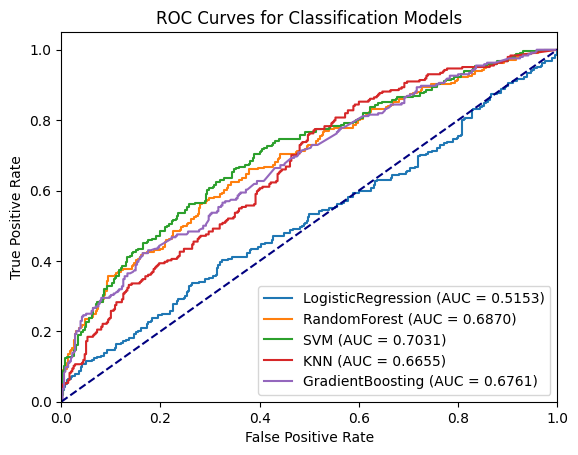

In [ ]:
best_models = {}
for name, model in models.items():
    print(f"Training {name}...")
    grid_search = GridSearchCV(model, param_grid[name], cv=5, scoring="accuracy", n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    best_models[name] = best_model

    # Предсказания и оценка на тестовой выборке
    y_pred = best_model.predict(X_test)

    # Выводим метрики
    print(f"Best parameters for {name}: {grid_search.best_params_}")
    print(f"Accuracy for {name}: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision for {name}: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall for {name}: {recall_score(y_test, y_pred):.4f}")
    print(f"F1 Score for {name}: {f1_score(y_test, y_pred):.4f}")
    print("-" * 30)
    # Рассчитываем вероятности для построения ROC-кривой
    if hasattr(best_model, "predict_proba"):
        y_proba = best_model.predict_proba(X_test)[:, 1]
    else:  # Для SVM используем decision_function
        y_proba = best_model.decision_function(X_test)

    # Построение ROC-кривой
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = roc_auc_score(y_test, y_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.4f})')

# Настройка графика ROC-кривых
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Classification Models')
plt.legend(loc="lower right")
plt.show()

Таким образом, наилучшая модель - Метод опорных векторов